Boston price 예측모델
- 데이터셋 : boston.csv
- 학습종류: 지도학습 / 회귀
- 알고리즘 : Ridge, Lasso, Elastine
- 피처: 모두.
- 타겟: medv   

In [264]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split, KFold
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
                                                    ## 교차검증

In [265]:
col = 'crim	zn	indus	chas	nox	rm	age	dis	rad	tax	ptratio	b	lstat	medv'.split()
len(col)
houseDict = {x:[] for x in col}
houseDF = pd.DataFrame(pd.read_csv('../data/housing.csv', header=None))
for i in houseDF.index:
    for j in range(14):
        houseDict[col[j]].append(houseDF.iloc[i,:][0].split()[j])

In [266]:
houDF = pd.DataFrame(houseDict)
houDF = houDF.astype(float)
houDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


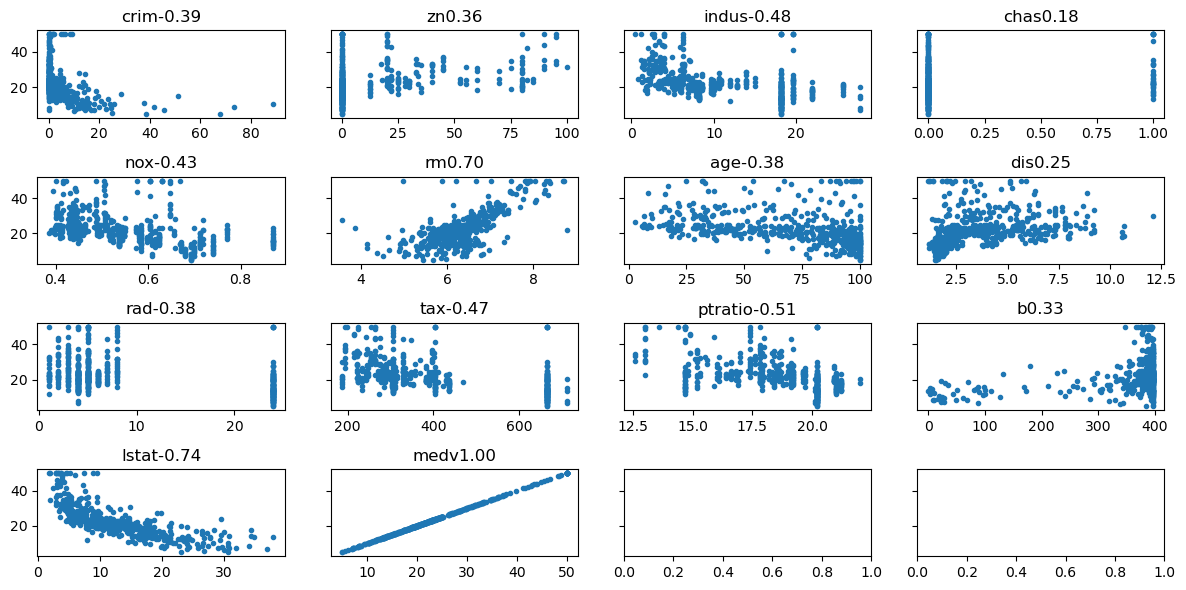

In [267]:
fig, ax = plt.subplots(4,4, sharey=True,figsize = (12,6))
ax = ax.flatten()
# print(ax[0])
for i in range(0,14):
    ax[i].plot(houDF.iloc[:,i],houDF['medv'], '.')
    ax[i].set_title(houDF.columns[i]+ str(f"{houDF.iloc[:,i].corr(houDF['medv']):.2f}"))

plt.tight_layout()
plt.show()    


In [268]:
nowDF = houDF[['rm','lstat','medv']]

In [269]:
# 전처리 필요. nowDF 기준으로 수정,
# boxplot로 이상치 제거후, minmax or standard로 정규화

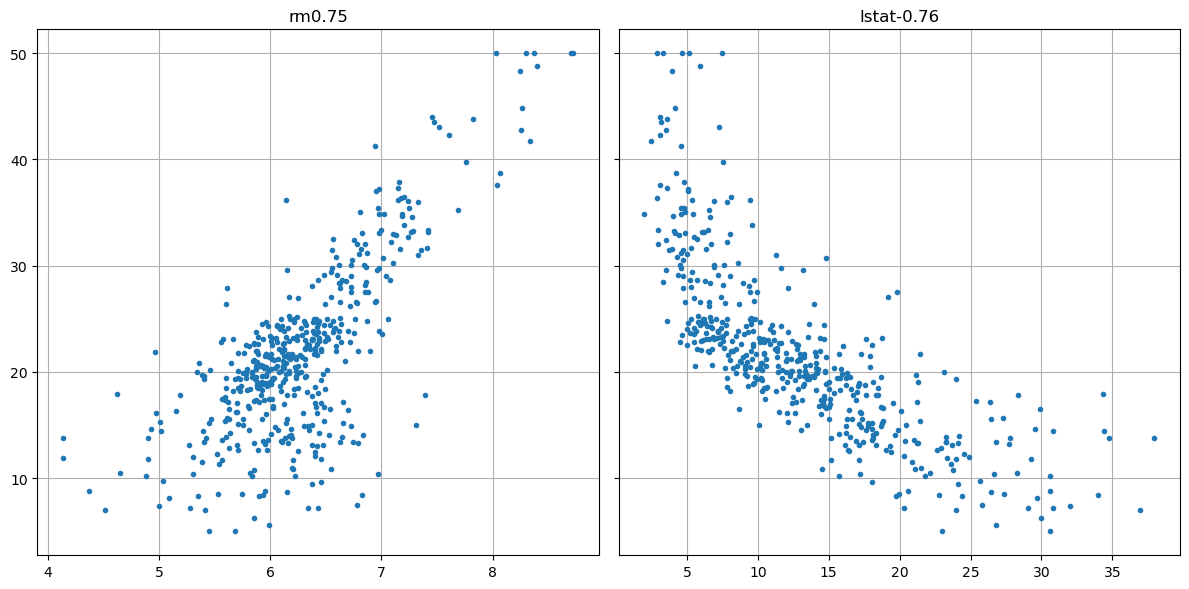

In [292]:
fig, ax = plt.subplots(1,2, sharey=True,figsize = (12,6))
ax = ax.flatten()
# print(ax[0])
for i in range(0,2):
    ax[i].plot(nowDF.iloc[:,i],nowDF['medv'], '.')
    ax[i].set_title(nowDF.columns[i]+ str(f"{nowDF.iloc[:,i].corr(nowDF['medv']):.2f}"))
    ax[i].grid()

plt.tight_layout()
plt.show()    

In [291]:
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['rm']<8) & (nowDF['medv']>45)].index)
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['rm']<4) & (nowDF['medv']<30)].index)
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['rm']>8) & (nowDF['medv']<30)].index)
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['lstat']>25) & (nowDF['medv']>20)].index)
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['lstat']<5) & (nowDF['medv']<15)].index)
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['lstat']<8) & (nowDF['medv']<15)].index)

In [272]:
# # 506개
# nowDF= nowDF.drop(nowDF.loc[(nowDF['rm']>7.5),:].index)
# nowDF= nowDF.drop(nowDF.loc[(nowDF['rm']<4.9),:].index)
# nowDF= nowDF.drop(nowDF.loc[(nowDF['lstat']>31),:].index)
# # 이상치 제거.

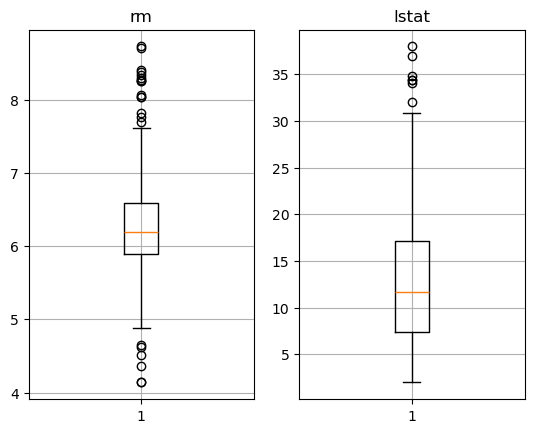

In [273]:
labels = nowDF.columns[:2]
colors = ['peachpuff', 'orange']

fig, axe = plt.subplots(1,2)
axe = axe.flatten()
# fill with colors
for ax, col in zip(axe, nowDF.columns[:2]):
    ax.boxplot(nowDF[[col]])
    ax.grid()
    ax.set_title(col)
plt.show()

In [274]:
saveDF = nowDF.copy()

In [275]:
nowDF.isna().sum()

rm       0
lstat    0
medv     0
dtype: int64

In [276]:
# from sklearn.preprocessing import MinMaxScaler
# #값의 범위가 다르므로 정규화
# array = nowDF[['rm', 'lstat']].to_numpy()
# minmax = MinMaxScaler()
# narr = minmax.fit_transform(array)
# nowDF[['rm', 'lstat']] = pd.DataFrame(narr)

In [277]:
nowDF = nowDF.dropna()

In [278]:
featureDF = nowDF[['rm', 'lstat']]
targetSR = nowDF['medv']

print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [279]:
## 학습용 : 테스트용 = 9:1
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape}, / y_test => {y_test.ndim}D, {y_test.shape}")

X_train => 2D (364, 2) / X_test => 2D, (122, 2)
y_train => 1D (364,), / y_test => 1D, (122,)


### 4 학습진행

In [280]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [281]:
## 교차검증 객체 생성 5개 분할 - default
kf = KFold()

## 선형회귀모델 객체 생성성
rid = Ridge()
las = Lasso()
ela = ElasticNet()


# kf.get_n_splits(X_train, y_train)

Ridge 모델

In [282]:
resultDF = pd.DataFrame(columns = ['alpha','train_score', 'test_score', 'train_loss', 'test_loss'])

## alpha값에 따른 Ridge 모델 성능 비교
for alpha in [0.1, 0.5, 1.0, 1.5, 2, 2.5, 3]:
    lr = Ridge(alpha)
    
    train_stotal , test_stotal = 0, 0
    train_ltotal, test_ltotal = 0, 0
    
        
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        # print(f"Fold {i}")
    # print(test_index in y_test.index)
        ## 학습용 / 테스트용 피쳐와 타겟 추출
        train_data, train_label = X_train.iloc[train_index, 1:], y_train.iloc[train_index]
        test_data, test_label = X_train.iloc[test_index, 1:], y_train.iloc[test_index]
        # print(train_data.columns)

        #학습
        lr.fit(train_data, train_label)
        
        train_score = lr.score(train_data, train_label)
        test_score = lr.score(test_data, test_label)

        train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
        test_loss = root_mean_squared_error(test_label, lr.predict(test_data))

        train_stotal += train_score
        test_stotal += test_score
        train_ltotal += train_loss
        test_ltotal += test_loss
    #alpha값 별로 성능과 손실값 평균 저장하기    
    resultDF.loc[alpha] = [alpha, train_stotal/5,test_stotal/5,train_ltotal/5,test_ltotal/5]


In [283]:
resultDF

,alpha,train_score,test_score,train_loss,test_loss
0.1,0.1,0.560729,0.543877,5.503681,5.554050
0.5,0.5,0.560729,0.543878,5.503681,5.554046
1.0,1.0,0.560729,0.543879,5.503681,5.554042
1.5,1.5,0.560729,0.543881,5.503681,5.554037
2.0,2.0,0.560729,0.543882,5.503681,5.554032
2.5,2.5,0.560729,0.543883,5.503681,5.554027
3.0,3.0,0.560729,0.543885,5.503681,5.554022


Text(0.5, 0.98, 'Ridge')

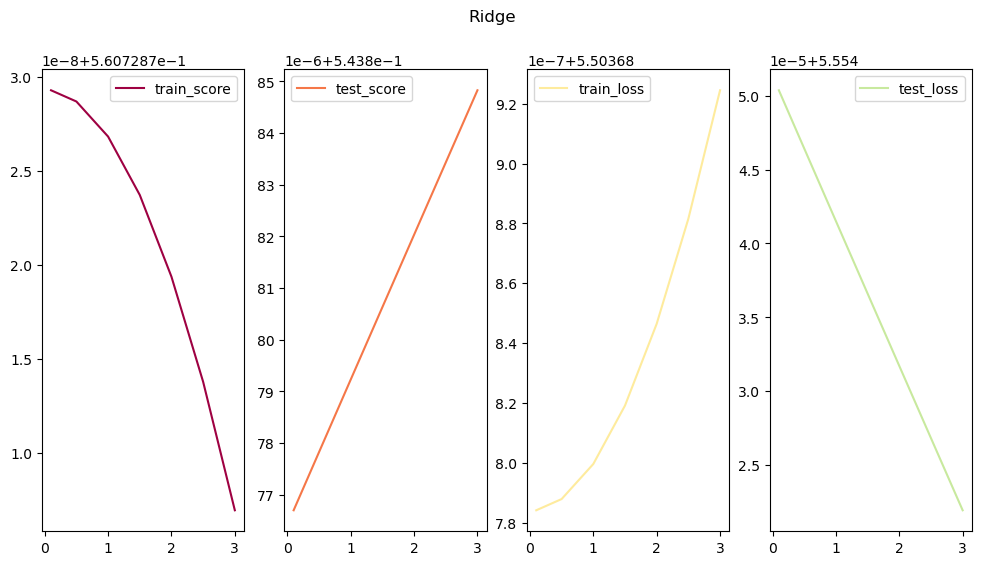

In [284]:
fig, axe = plt.subplots(1,4, figsize=(12,6), sharex=True)
axe = axe.flatten()
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 5, 24)]
for ax, col, color1 in zip(axe, resultDF.columns[1:], colors):
    ax.plot(resultDF['alpha'], resultDF[col], color = color1, label=col)
    ax.legend()

fig.suptitle('Ridge')

In [285]:
resultDF = pd.DataFrame(columns = ['alpha','train_score', 'test_score', 'train_loss', 'test_loss'])

## alpha값에 따른 Ridge 모델 성능 비교
for alpha in [0.1, 0.3, 0.5, 0.7, 1.0]:
    lr = Lasso(alpha)
    
    train_stotal , test_stotal = 0, 0
    train_ltotal, test_ltotal = 0, 0
    
        
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        # print(f"Fold {i}")
    # print(test_index in y_test.index)
        ## 학습용 / 테스트용 피쳐와 타겟 추출
        train_data, train_label = X_train.iloc[train_index, 1:], y_train.iloc[train_index]
        test_data, test_label = X_train.iloc[test_index, 1:], y_train.iloc[test_index]
        # print(train_data.columns)

        #학습
        lr.fit(train_data, train_label)
        
        train_score = lr.score(train_data, train_label)
        test_score = lr.score(test_data, test_label)

        train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
        test_loss = root_mean_squared_error(test_label, lr.predict(test_data))

        train_stotal += train_score
        test_stotal += test_score
        train_ltotal += train_loss
        test_ltotal += test_loss
    #alpha값 별로 성능과 손실값 평균 저장하기    
    resultDF.loc[alpha] = [alpha, train_stotal/5,test_stotal/5,train_ltotal/5,test_ltotal/5]


In [286]:
resultDF

,alpha,train_score,test_score,train_loss,test_loss
0.1,0.1,0.560726,0.543951,5.503698,5.553836
0.3,0.3,0.560703,0.544083,5.503839,5.553510
0.5,0.5,0.560658,0.544191,5.504121,5.553324
0.7,0.7,0.560591,0.544276,5.504544,5.553278
1.0,1.0,0.560447,0.544358,5.505442,5.553472


Text(0.5, 0.98, 'lasso')

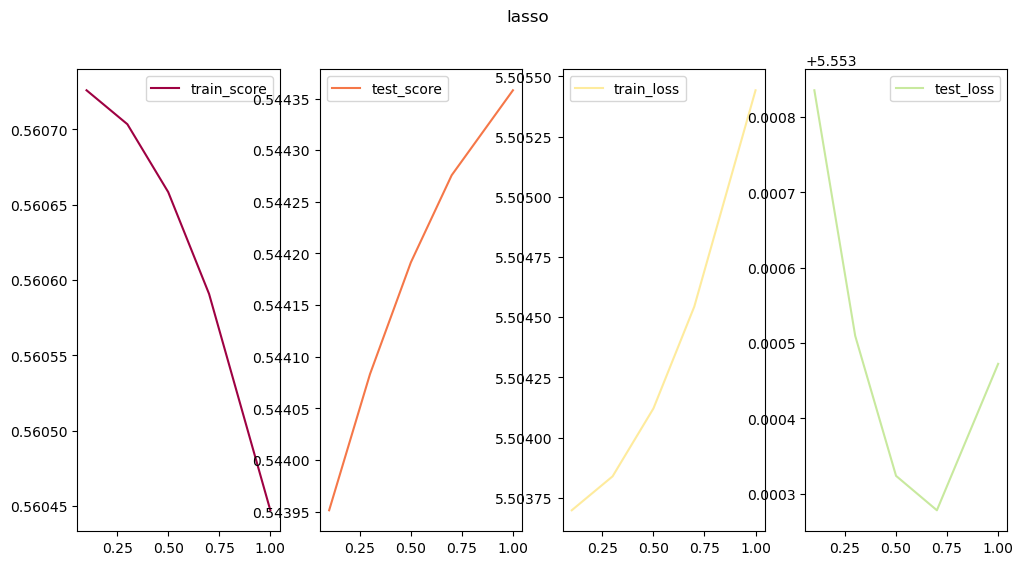

In [287]:
fig, axe = plt.subplots(1,4, figsize=(12,6), sharex=True)
axe = axe.flatten()
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 5, 24)]
for ax, col, color1 in zip(axe, resultDF.columns[1:], colors):
    ax.plot(resultDF['alpha'], resultDF[col], color = color1, label=col)
    ax.legend()
fig.suptitle('lasso')

In [288]:
resultDF = pd.DataFrame(columns = ['alpha','train_score', 'test_score', 'train_loss', 'test_loss'])

## alpha값에 따른 Ridge 모델 성능 비교
for alpha in [0.1, 0.5, 1.0, 1.25, 1.5, 1.75, 2]:
    lr = ElasticNet(alpha)
    
    train_stotal , test_stotal = 0, 0
    train_ltotal, test_ltotal = 0, 0
    
        
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        # print(f"Fold {i}")
    # print(test_index in y_test.index)
        ## 학습용 / 테스트용 피쳐와 타겟 추출
        train_data, train_label = X_train.iloc[train_index, 1:], y_train.iloc[train_index]
        test_data, test_label = X_train.iloc[test_index, 1:], y_train.iloc[test_index]
        # print(train_data.columns)

        #학습
        lr.fit(train_data, train_label)
        
        train_score = lr.score(train_data, train_label)
        test_score = lr.score(test_data, test_label)

        train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
        test_loss = root_mean_squared_error(test_label, lr.predict(test_data))

        train_stotal += train_score
        test_stotal += test_score
        train_ltotal += train_loss
        test_ltotal += test_loss
    #alpha값 별로 성능과 손실값 평균 저장하기    
    resultDF.loc[alpha] = [alpha, train_stotal/5,test_stotal/5,train_ltotal/5,test_ltotal/5]


In [289]:
resultDF

,alpha,train_score,test_score,train_loss,test_loss
0.10,0.10,0.560726,0.543954,5.503696,5.553805
0.50,0.50,0.560668,0.544210,5.504061,5.553129
1.00,1.00,0.560488,0.544413,5.505186,5.552968
1.25,1.25,0.560355,0.544467,5.506021,5.553166
1.50,1.50,0.560193,0.544489,5.507034,5.553547
1.75,1.75,0.560003,0.544480,5.508223,5.554107
2.00,2.00,0.559786,0.544441,5.509584,5.554844


Text(0.5, 0.98, 'ElasticNet')

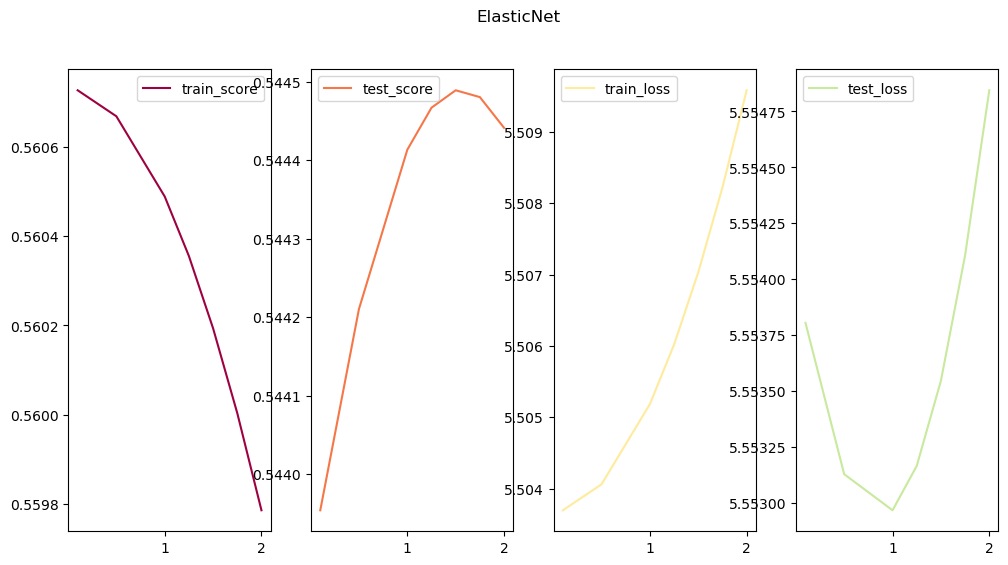

In [290]:
fig, axe = plt.subplots(1,4, figsize=(12,6), sharex=True)
axe = axe.flatten()
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 5, 24)]
for ax, col, color1 in zip(axe, resultDF.columns[1:], colors):
    ax.plot(resultDF['alpha'], resultDF[col], color = color1, label=col)
    ax.legend()
    
fig.suptitle('ElasticNet')